The following cell performs the initialisation of modules and data read-in,
unless this is changed, or the read-in data modified, it only needs to be run once each time the notebook is opened

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#function for converting the byte object version of the date and time into a datetime object
def strtodatetime(x):
    return dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

datapath = 'C:/Users/tmk5/Downloads/' #this should be your own path containing the data file
datafile = 'Weather_all.csv' #name of the data file itself

#header=0 specifies that the first row (index 0) is the header
#converters={0:strtodatetime} modifies the strings forming the dates in the file into datetime objects
#index_col=0 specifies that the first column (the datetimes) are what the data are indexed on
data = pd.read_csv(datapath+datafile,header=0,converters={0:strtodatetime},index_col=0)
data.columns = data.columns.str.replace(' ', '') #strip spaces from the column headings
data.columns = data.columns.str.replace('#', '') #strip hash symbol from the column headings
data[data < -99998] = np.nan #replace all missing data (with it's default -99999) with numpy nans, as this is understood as missing data by pandas


The following cell shows a quick check of the data read in above

In [78]:
#print(f"Read in {len(data['DateTime'])} dates and times, earliest is {np.min(data['DateTime'])} and latest is {np.max(data['DateTime'])}, duration is {np.max(data['DateTime']) - np.min(data['DateTime'])}")

print('\nColumn info')
print(data.columns) #show all of the column names

print('\nDataset basic stats')
print(data.describe()) #shows basic stats of all columns


Column info
Index(['TE', 'WU', 'RT', 'WK', 'WR', 'WT', 'WG', 'WS', 'WD', 'WV', 'TI', 'FI',
       'TX', 'FX'],
      dtype='object')

Dataset basic stats
                  TE             WU             RT             WK  \
count  684568.000000  684568.000000  684568.000000  684568.000000   
mean       10.806594    1231.345015       0.063154       0.868156   
std         5.955508    1035.642260       0.243239       0.338321   
min        -9.280000       0.000000       0.000000       0.000000   
25%         6.500000     221.220000       0.000000       1.000000   
50%        10.430000    1106.090000       0.000000       1.000000   
75%        14.890000    2063.810000       0.000000       1.000000   
max        56.820000   11422.500000       1.000000       1.000000   

                  WR             WT             WG            WS  \
count  684568.000000  684568.000000  684568.000000  684568.00000   
mean      195.467858      11.616141       7.938068      15.56197   
std        90.25149

The following cell produces a simple graph of all OAT readings over time, this uses only the default settings for a basic plot

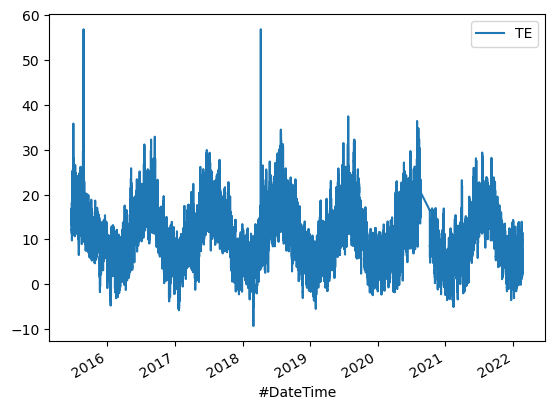

In [80]:
ax = data.plot(y="TE")

The following example is a more elaborate version of the same data

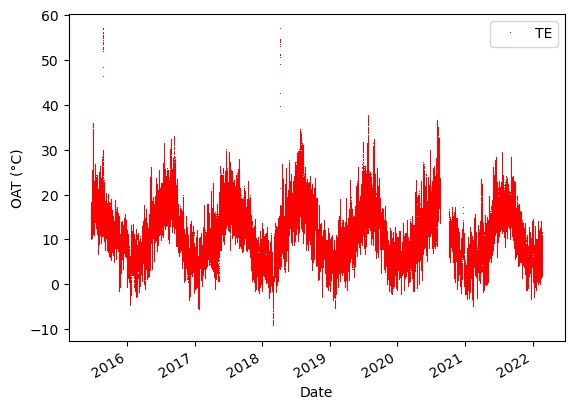

In [60]:
ax = data.plot(y="TE",xlabel='Date',ylabel='OAT (°C)',linestyle='none',marker=',',color='red')

The following is one approach to selecting a particular range of dates to plot OAT. Note that the original data is not modified; we are just selecting a subset at the time of plotting and using that. Modifying source data is potentially fragile as sequential runs may then be working on different data

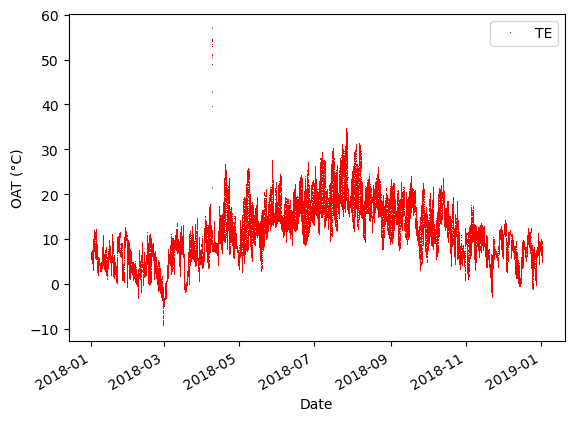

In [73]:
ax = data['2018-1-1':'2019-1-1'].plot(y="TE",xlabel='Date',ylabel='OAT (°C)',linestyle='none',marker=',',color='red')

Of note in the previous plot are some outlier points approaching 60°C. These are likely anomalous. The following example trims the most egregious ones.

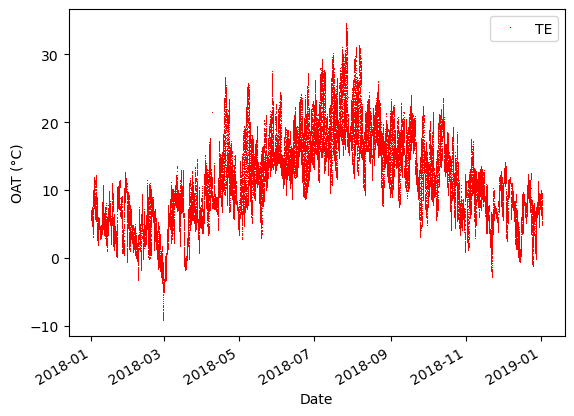

In [82]:
ax = data['2018-1-1':'2019-1-1'].query('TE < 35 and TE > -20').plot(y="TE",xlabel='Date',ylabel='OAT (°C)',linestyle='none',marker=',',color='red')

The following is how pandas provides an easy way to resample by grouped dates; in this case reducing to a single datapoint per day, calculated using the mean

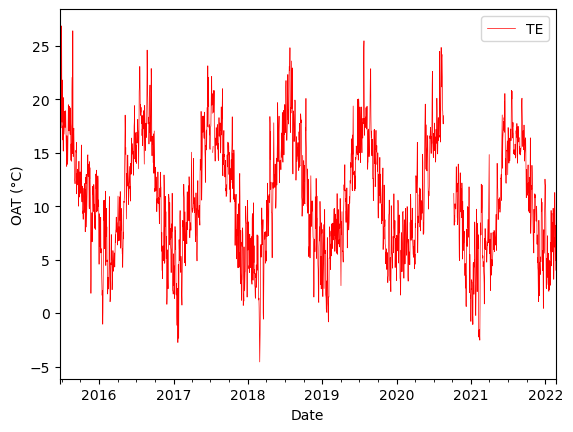

In [76]:
ax = data.resample("1D",origin='start_day').mean().plot(y="TE",xlabel='Date',ylabel='OAT (°C)',linestyle='solid',linewidth=0.5,marker='none',color='red')

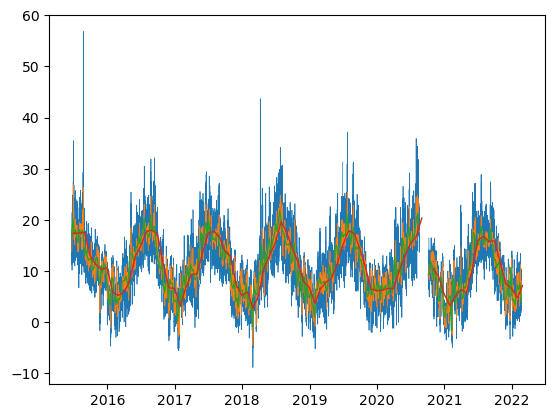

In [92]:
#This is similar, comparing several different "smoothnesses"
d1h = data.resample("1h",origin='start_day').mean()
d1D = data.resample("1D",origin='start_day').mean()
d1W = data.resample("7D",origin='start_day').mean()
d1M = data.resample("1M",origin='start_day').mean()
plt.plot(d1h.index.array,d1h['TE'],lw=0.5,label='1 hour')
plt.plot(d1D.index.array,d1D['TE'],lw=0.5,label='1 day')
plt.plot(d1W.index.array,d1W['TE'],lw=1,label='1 week')
plt.plot(d1M.index.array,d1M['TE'],lw=1,label='1 month')
plt.show()